# MNIST Digit Classification with Convolutional Neural Network (CNN)

**Discipline(s):** Computer Vision, Deep Learning

colab에서 돌릴 경우, 런타임 유형을 GPU로 변경해주세요.

## 1. Import Statements

---



In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import random

## 2. Data Preprocessing

---



The first step is to preprocess our data.

In [15]:
BATCH_SIZE = 64
EPOCHS = 10
LEARNING_RATE = 0.001
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [16]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

In [17]:
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset  = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [18]:
X_train = train_dataset.data
y_train = train_dataset.targets
X_test = test_dataset.data
y_test = test_dataset.targets

print("Training Images:", X_train.shape)  # [60000, 28, 28]
print("Testing Images:", X_test.shape)    # [10000, 28, 28]
print("Training Labels:", y_train.shape)  # [60000]
print("Test Labels:", y_test.shape)       # [10000]

Training Images: torch.Size([60000, 28, 28])
Testing Images: torch.Size([10000, 28, 28])
Training Labels: torch.Size([60000])
Test Labels: torch.Size([10000])


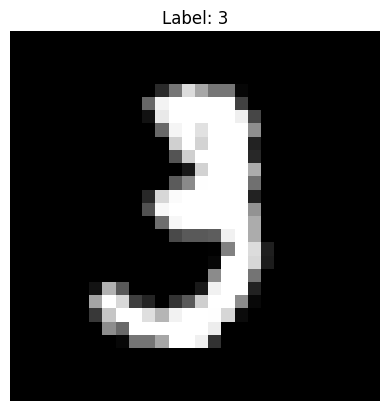

In [19]:
plt.imshow(X_train[10], cmap='gray')
plt.title(f"Label: {y_train[10].item()}")
plt.axis('off')
plt.show()

## 3. Convolutional Neural Network (CNN)

---



### 3.1. Define the Model

We then have to define our convolutional neural network.

In [24]:
# CNN 모델 정의 -> 차원이 어떻게 될지 생각하면서 코드 빈칸을 채워주세요.
class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1), #(32, 28, 28)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2), #(32, 14, 14)

            # 모델을 더 깊게 쌓아도 됩니다.
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1), #(64, 14, 14)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2), #(64, 7, 7)

            # fully connected layer 전, flatten 과정 필요
            nn.Flatten(),
            nn.Linear(in_features=64*7*7, out_features=128),
            nn.ReLU(),
            nn.Linear(in_features=128, out_features=10)
        )

    def forward(self, x):
        return self.net(x)

In [25]:
# 모델 준비
model = SimpleCNN().to(DEVICE)

Once our model is defined, we can compile it using the Adam optimizer and the categorical cross-entropy loss function.

In [26]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

### 3.2. Train the Model

In [27]:
def train(model, loader):
    model.train()
    total_loss = 0
    correct = 0
    total = 0
    for x, y in loader:
        x, y = x.to(DEVICE), y.to(DEVICE)
        optimizer.zero_grad()
        output = model(x)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * y.size(0)
        correct += (output.argmax(dim=1) == y).sum().item()
        total += y.size(0)

    avg_loss = total_loss / total
    accuracy = correct / total
    return avg_loss, accuracy

In [28]:
def evaluate(model, loader):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(DEVICE), y.to(DEVICE)
            output = model(x)
            loss = criterion(output, y)

            total_loss += loss.item() * y.size(0)
            correct += (output.argmax(dim=1) == y).sum().item()
            total += y.size(0)

    avg_loss = total_loss / total
    accuracy = correct / total
    return avg_loss, accuracy

In [29]:
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

for epoch in range(EPOCHS):
    train_loss, train_acc = train(model, train_loader)
    test_loss, test_acc = evaluate(model, test_loader)

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)

    print(f"[Epoch {epoch+1}] "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | "
          f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")

[Epoch 1] Train Loss: 0.1379, Train Acc: 0.9579 | Test Loss: 0.0403, Test Acc: 0.9864
[Epoch 2] Train Loss: 0.0435, Train Acc: 0.9862 | Test Loss: 0.0396, Test Acc: 0.9867
[Epoch 3] Train Loss: 0.0294, Train Acc: 0.9909 | Test Loss: 0.0286, Test Acc: 0.9908
[Epoch 4] Train Loss: 0.0219, Train Acc: 0.9930 | Test Loss: 0.0325, Test Acc: 0.9895
[Epoch 5] Train Loss: 0.0163, Train Acc: 0.9950 | Test Loss: 0.0284, Test Acc: 0.9913
[Epoch 6] Train Loss: 0.0122, Train Acc: 0.9962 | Test Loss: 0.0409, Test Acc: 0.9867
[Epoch 7] Train Loss: 0.0120, Train Acc: 0.9957 | Test Loss: 0.0367, Test Acc: 0.9893
[Epoch 8] Train Loss: 0.0076, Train Acc: 0.9975 | Test Loss: 0.0377, Test Acc: 0.9897
[Epoch 9] Train Loss: 0.0082, Train Acc: 0.9970 | Test Loss: 0.0352, Test Acc: 0.9898
[Epoch 10] Train Loss: 0.0073, Train Acc: 0.9977 | Test Loss: 0.0379, Test Acc: 0.9901


### 3.3. 시각화

Finally, we can plot the curves.

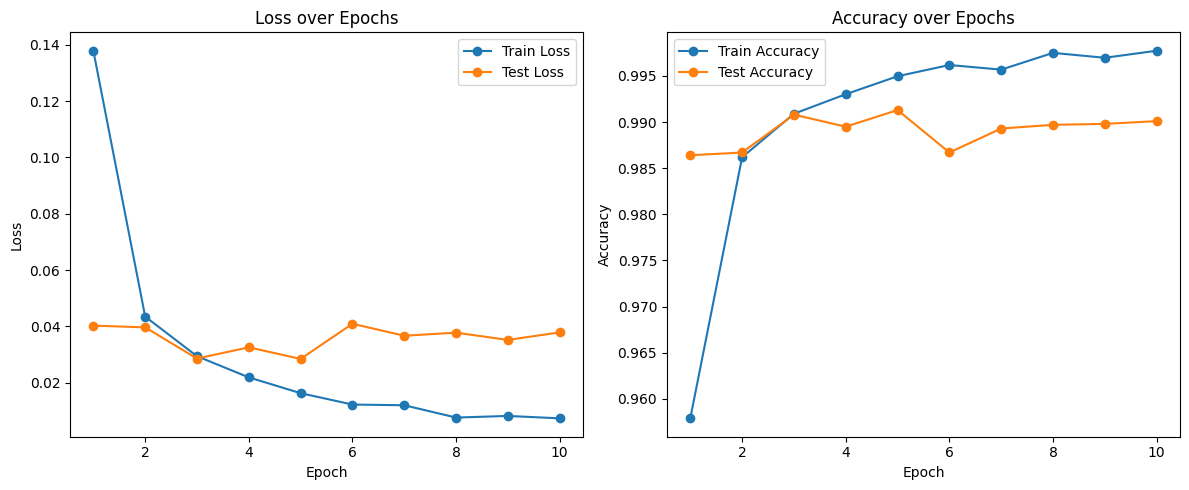

In [30]:
epochs = range(1, EPOCHS + 1)

plt.figure(figsize=(12, 5))

# Loss 그래프
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss', marker='o')
plt.plot(epochs, test_losses, label='Test Loss', marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.legend()

# Accuracy 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(epochs, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy over Epochs")
plt.legend()

plt.tight_layout()
plt.show()

## 4. Make a Prediction

---



Once our model is trained, we can use it to make predictions. To do this, we first use our test set to predict the classes.

In [31]:
def show_random_predictions(model, dataset, num_images=5):
    model.eval()

    indices = random.sample(range(len(dataset)), num_images)
    images = torch.stack([dataset[i][0] for i in indices])
    labels = torch.tensor([dataset[i][1] for i in indices])

    images = images.to(DEVICE)
    outputs = model(images)
    preds = outputs.argmax(dim=1)

    plt.figure(figsize=(12, 3))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i].cpu().squeeze(), cmap='gray')
        plt.title(f"GT: {labels[i].item()}\nPred: {preds[i].item()}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

Finally, we can show a random test image with its corresponding prediction.

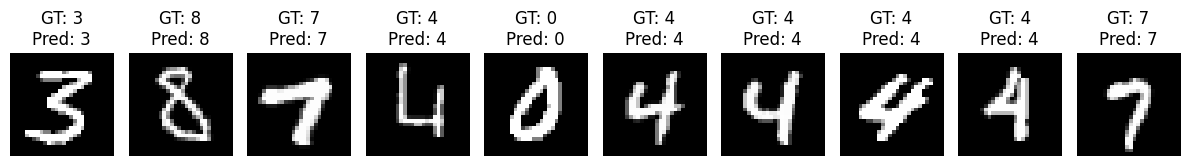

In [47]:
show_random_predictions(model, test_dataset, num_images=10)

## ResNet

In [49]:
BATCH_SIZE = 64
EPOCHS = 10
LEARNING_RATE = 0.001
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [63]:
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()

        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=1, padding=1)
        # batch normalization
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU()
        # 추가로 layer 등을 더 구현하셔도 됩니다.


        # Skip connection: 채널 수가 다르면 어떤 convolution layer를 사용하는게 좋을지 생각해주세요.
        if in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=1),
                nn.BatchNorm2d(out_channels)
            )
        else:
            self.shortcut = nn.Identity()

    def forward(self, x):
        identity = self.shortcut(x)
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        # 빈칸 채우기
        out += identity
        return self.relu(out)

In [64]:
class ResNetLike(nn.Module):
    def __init__(self):
        super().__init__()
        self.stem = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        # layer 등을 추가로 더 쌓으셔도 됩니다.
        self.layer1 = ResidualBlock(16, 32)
        self.layer2 = ResidualBlock(32, 64)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))

        # 빈칸을 채워주세요.
        self.fc = nn.Linear(64, 10)

    def forward(self, x):
        # 빈칸을 채워주세요.
        x = self.stem(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.avgpool(x)
        x = torch.flatten(x,1)
        x = self.fc(x)

        return x

In [65]:
model = ResNetLike().to(DEVICE)

In [66]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [67]:
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

for epoch in range(EPOCHS):
    train_loss, train_acc = train(model, train_loader)
    test_loss, test_acc = evaluate(model, test_loader)

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)

    print(f"[Epoch {epoch+1}] "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | "
          f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")

[Epoch 1] Train Loss: 0.2707, Train Acc: 0.9405 | Test Loss: 0.1063, Test Acc: 0.9693
[Epoch 2] Train Loss: 0.0528, Train Acc: 0.9858 | Test Loss: 0.0492, Test Acc: 0.9853
[Epoch 3] Train Loss: 0.0389, Train Acc: 0.9885 | Test Loss: 0.0355, Test Acc: 0.9895
[Epoch 4] Train Loss: 0.0313, Train Acc: 0.9909 | Test Loss: 0.0309, Test Acc: 0.9903
[Epoch 5] Train Loss: 0.0277, Train Acc: 0.9919 | Test Loss: 0.0239, Test Acc: 0.9924
[Epoch 6] Train Loss: 0.0231, Train Acc: 0.9929 | Test Loss: 0.0674, Test Acc: 0.9794
[Epoch 7] Train Loss: 0.0215, Train Acc: 0.9934 | Test Loss: 0.0322, Test Acc: 0.9895
[Epoch 8] Train Loss: 0.0190, Train Acc: 0.9941 | Test Loss: 0.0305, Test Acc: 0.9900
[Epoch 9] Train Loss: 0.0173, Train Acc: 0.9946 | Test Loss: 0.0227, Test Acc: 0.9923
[Epoch 10] Train Loss: 0.0151, Train Acc: 0.9955 | Test Loss: 0.0266, Test Acc: 0.9927


### 시각화

Finally, we can plot the curves.

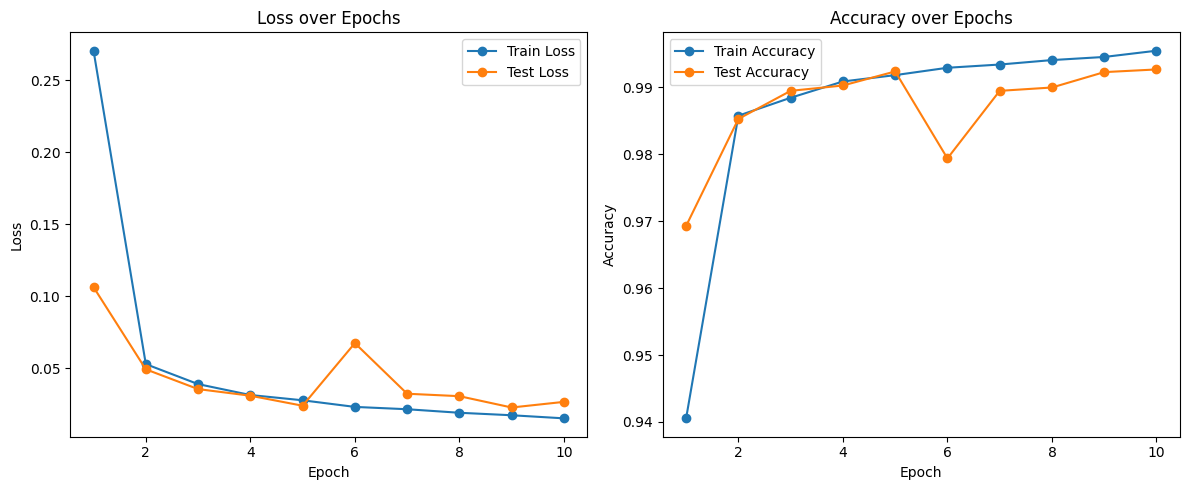

In [68]:
epochs = range(1, EPOCHS + 1)

plt.figure(figsize=(12, 5))

# Loss 그래프
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss', marker='o')
plt.plot(epochs, test_losses, label='Test Loss', marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.legend()

# Accuracy 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(epochs, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy over Epochs")
plt.legend()

plt.tight_layout()
plt.show()

### Make a Prediction

---



Once our model is trained, we can use it to make predictions. To do this, we first use our test set to predict the classes.

In [69]:
def show_random_predictions(model, dataset, num_images=5):
    model.eval()

    indices = random.sample(range(len(dataset)), num_images)
    images = torch.stack([dataset[i][0] for i in indices])
    labels = torch.tensor([dataset[i][1] for i in indices])

    images = images.to(DEVICE)
    outputs = model(images)
    preds = outputs.argmax(dim=1)

    plt.figure(figsize=(12, 3))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i].cpu().squeeze(), cmap='gray')
        plt.title(f"GT: {labels[i].item()}\nPred: {preds[i].item()}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

Finally, we can show a random test image with its corresponding prediction.

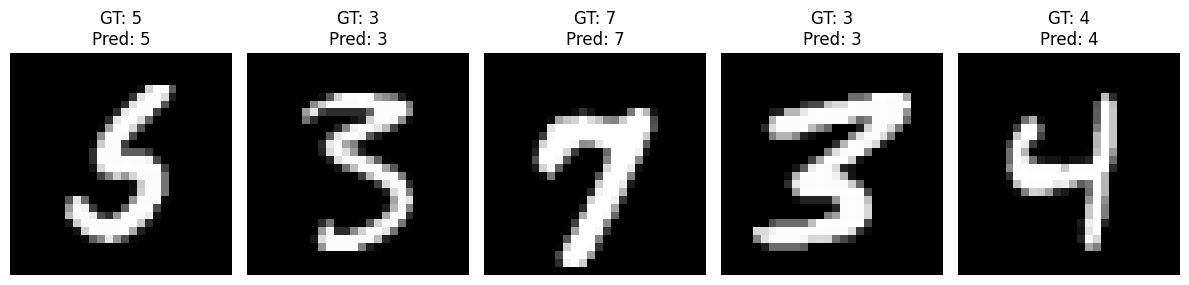

In [70]:
show_random_predictions(model, test_dataset, num_images=5)

# 다른 데이터셋으로도 진행해보기

In [72]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import random

In [73]:
BATCH_SIZE = 64
EPOCHS = 10
LEARNING_RATE = 0.001
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [74]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
])

In [89]:
trainset = datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
testset  = datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)
test_loader  = DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False)

classes = train_dataset.classes

In [90]:
Xtrain = trainset.data
ytrain = trainset.targets
Xtest = testset.data
ytest = testset.targets

print("Training Images:", Xtrain.shape)  # [50000, 32, 32, 3]
print("Testing Images:", Xtest.shape)    # [10000, 32, 32, 3]
print("Training Labels:", len(ytrain))  # [50000]
print("Test Labels:", len(ytest))       # [10000]

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)
Training Labels: 50000
Test Labels: 10000


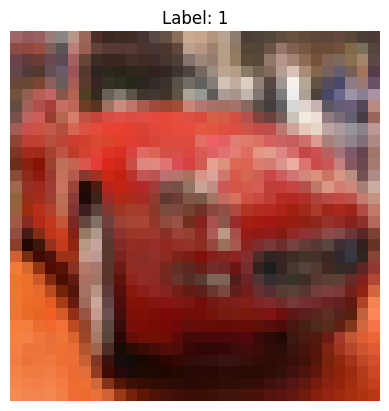

In [91]:
plt.imshow(Xtrain[5])
plt.title(f"Label: {ytrain[5]}")
plt.axis('off')
plt.show()

In [105]:
# CNN
class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1), #(32, 32, 32, 3)
            nn.ReLU(),
            nn.Dropout2d(p=0.2),
            nn.MaxPool2d(kernel_size=2), #(32, 16, 16 ,3)

            # 모델을 더 깊게 쌓아도 됩니다.
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1), #(64, 16, 16, 3)
            nn.ReLU(),
            nn.Dropout2d(p=0.2),
            nn.MaxPool2d(kernel_size=2), #(64, 8, 8, 3)

            # fully connected layer 전, flatten 과정 필요
            nn.Flatten(),
            nn.Linear(in_features=64*8*8, out_features=512),
            nn.ReLU(),
            nn.Linear(in_features=512, out_features=10)
        )

    def forward(self, x):
        return self.net(x)

In [106]:
# 모델 준비
model = SimpleCNN().to(DEVICE)

In [107]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [108]:
def train(model, loader):
    model.train()
    total_loss = 0
    correct = 0
    total = 0
    for x, y in loader:
        x, y = x.to(DEVICE), y.to(DEVICE)
        optimizer.zero_grad()
        output = model(x)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * y.size(0)
        correct += (output.argmax(dim=1) == y).sum().item()
        total += y.size(0)

    avg_loss = total_loss / total
    accuracy = correct / total
    return avg_loss, accuracy

In [109]:
def evaluate(model, loader):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(DEVICE), y.to(DEVICE)
            output = model(x)
            loss = criterion(output, y)

            total_loss += loss.item() * y.size(0)
            correct += (output.argmax(dim=1) == y).sum().item()
            total += y.size(0)

    avg_loss = total_loss / total
    accuracy = correct / total
    return avg_loss, accuracy

In [110]:
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

for epoch in range(EPOCHS):
    train_loss, train_acc = train(model, train_loader)
    test_loss, test_acc = evaluate(model, test_loader)

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)

    print(f"[Epoch {epoch+1}] "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | "
          f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")

    # overfitting 심해서 droupout 넣어봤음
    # 효과는 거의 미미한 편 / dropout 있는게 더 효율적이긴 함

[Epoch 1] Train Loss: 1.4308, Train Acc: 0.4895 | Test Loss: 1.0914, Test Acc: 0.6068
[Epoch 2] Train Loss: 1.0720, Train Acc: 0.6186 | Test Loss: 0.9388, Test Acc: 0.6700
[Epoch 3] Train Loss: 0.9186, Train Acc: 0.6787 | Test Loss: 0.8787, Test Acc: 0.6931
[Epoch 4] Train Loss: 0.8055, Train Acc: 0.7156 | Test Loss: 0.8338, Test Acc: 0.7117
[Epoch 5] Train Loss: 0.6946, Train Acc: 0.7542 | Test Loss: 0.8165, Test Acc: 0.7184
[Epoch 6] Train Loss: 0.6017, Train Acc: 0.7883 | Test Loss: 0.8076, Test Acc: 0.7297
[Epoch 7] Train Loss: 0.5154, Train Acc: 0.8176 | Test Loss: 0.8528, Test Acc: 0.7173
[Epoch 8] Train Loss: 0.4427, Train Acc: 0.8447 | Test Loss: 0.8489, Test Acc: 0.7233
[Epoch 9] Train Loss: 0.3703, Train Acc: 0.8696 | Test Loss: 0.8962, Test Acc: 0.7290
[Epoch 10] Train Loss: 0.3227, Train Acc: 0.8877 | Test Loss: 0.9354, Test Acc: 0.7245


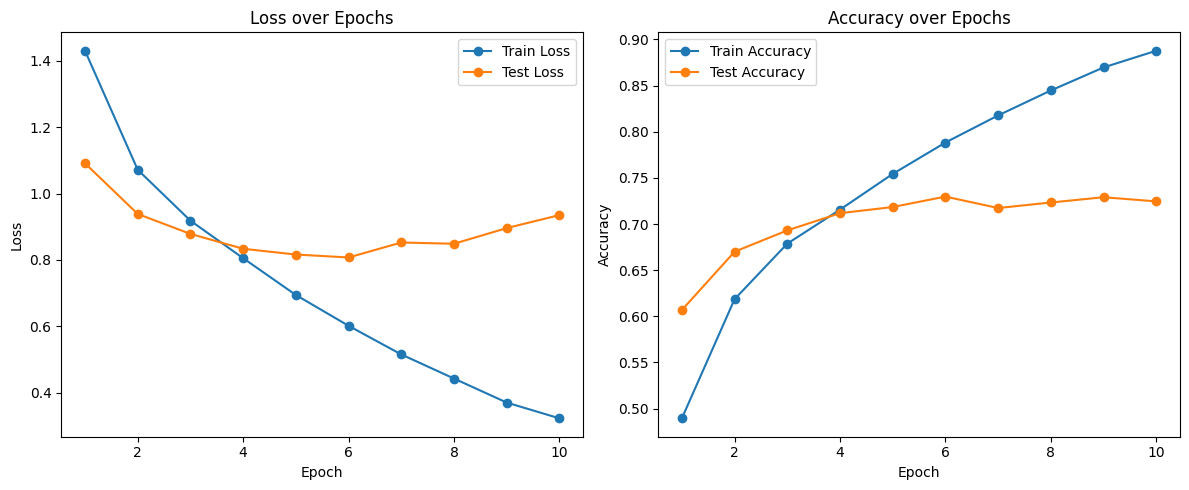

In [111]:
epochs = range(1, EPOCHS + 1)

plt.figure(figsize=(12, 5))

# Loss 그래프
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss', marker='o')
plt.plot(epochs, test_losses, label='Test Loss', marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.legend()

# Accuracy 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(epochs, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy over Epochs")
plt.legend()

plt.tight_layout()
plt.show()

In [120]:
unnormalize = transforms.Normalize(mean=(-1,-1,-1), std=(2,2,2))

In [129]:
def show_random_predictions(model, dataset, num_images=5):
    model.eval()

    indices = random.sample(range(len(dataset)), num_images)
    images = torch.stack([dataset[i][0] for i in indices])
    labels = torch.tensor([dataset[i][1] for i in indices])

    images = images.to(DEVICE)
    outputs = model(images)
    preds = outputs.argmax(dim=1)

    plt.figure(figsize=(12, 3))
    for i in range(num_images):
        img = images[i].cpu()
        img_unnormalized = unnormalize(img)
        np_img = img_unnormalized.permute(1, 2, 0)
        class_names = dataset.classes
        gt_name = class_names[ labels[i].item()]
        pred_name = class_names[ preds[i].item()]
        plt.subplot(1, num_images, i+1)
        plt.imshow(np_img)
        plt.title(f"GT: {gt_name}\nPred: {pred_name}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

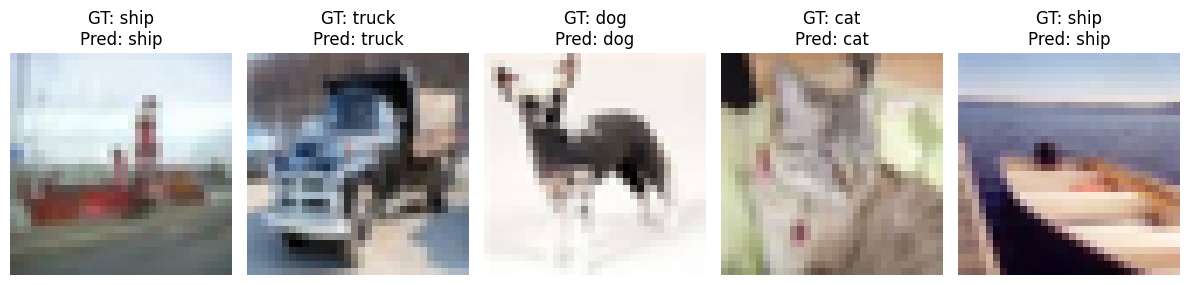

In [132]:
show_random_predictions(model, testset, num_images=5)

ResNET

In [ ]:
BATCH_SIZE = 64
EPOCHS = 10
LEARNING_RATE = 0.001
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [149]:
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()

        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=1, padding=1)
        # batch normalization
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.conv3 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1 ,padding =1)
        self.bn3 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU()
        # 추가로 layer 등을 더 구현하셔도 됩니다.


        # Skip connection: 채널 수가 다르면 어떤 convolution layer를 사용하는게 좋을지 생각해주세요.
        if in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=1),
                nn.BatchNorm2d(out_channels)
            )
        else:
            self.shortcut = nn.Identity()

    def forward(self, x):
        identity = self.shortcut(x)
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out = self.conv3(out)
        out = self.bn3(out)
        # 빈칸 채우기
        out += identity
        return self.relu(out)

In [150]:
class ResNetLike(nn.Module):
    def __init__(self):
        super().__init__()
        self.stem = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        # layer 등을 추가로 더 쌓으셔도 됩니다.
        self.layer1 = ResidualBlock(16, 32)
        self.layer2 = ResidualBlock(32, 64)
        self.layer3 = ResidualBlock(64, 128)
        self.layer4 = ResidualBlock(128, 256)
        self.layer5 = ResidualBlock(256, 512)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))

        # 빈칸을 채워주세요.
        self.fc = nn.Linear(512, 10)

    def forward(self, x):
        # 빈칸을 채워주세요.
        x = self.stem(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        x = self.avgpool(x)
        x = torch.flatten(x,1)
        x = self.fc(x)

        return x

In [151]:
model = ResNetLike().to(DEVICE)

In [152]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [153]:
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

for epoch in range(EPOCHS):
    train_loss, train_acc = train(model, train_loader)
    test_loss, test_acc = evaluate(model, test_loader)

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)

    print(f"[Epoch {epoch+1}] "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | "
          f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")

    # 성능이 올라가긴 했으나 여전히 아쉬움

[Epoch 1] Train Loss: 1.3652, Train Acc: 0.4969 | Test Loss: 1.2138, Test Acc: 0.5636
[Epoch 2] Train Loss: 1.0090, Train Acc: 0.6401 | Test Loss: 0.9251, Test Acc: 0.6741
[Epoch 3] Train Loss: 0.8494, Train Acc: 0.6989 | Test Loss: 0.8984, Test Acc: 0.6860
[Epoch 4] Train Loss: 0.7371, Train Acc: 0.7417 | Test Loss: 0.7372, Test Acc: 0.7363
[Epoch 5] Train Loss: 0.6593, Train Acc: 0.7687 | Test Loss: 0.7781, Test Acc: 0.7383
[Epoch 6] Train Loss: 0.5923, Train Acc: 0.7921 | Test Loss: 0.6947, Test Acc: 0.7617
[Epoch 7] Train Loss: 0.5385, Train Acc: 0.8118 | Test Loss: 0.6448, Test Acc: 0.7781
[Epoch 8] Train Loss: 0.4963, Train Acc: 0.8290 | Test Loss: 0.6211, Test Acc: 0.7897
[Epoch 9] Train Loss: 0.4556, Train Acc: 0.8424 | Test Loss: 0.5937, Test Acc: 0.8036
[Epoch 10] Train Loss: 0.4191, Train Acc: 0.8530 | Test Loss: 0.6410, Test Acc: 0.7930


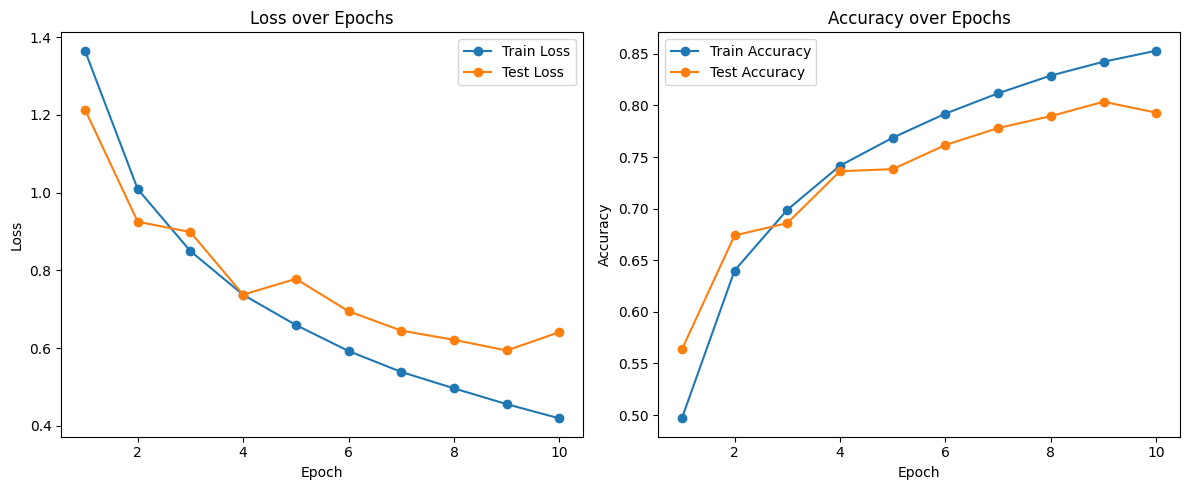

In [154]:
epochs = range(1, EPOCHS + 1)

plt.figure(figsize=(12, 5))

# Loss 그래프
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss', marker='o')
plt.plot(epochs, test_losses, label='Test Loss', marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.legend()

# Accuracy 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(epochs, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy over Epochs")
plt.legend()

plt.tight_layout()
plt.show()

In [169]:
def show_random_predictions(model, dataset, num_images=5):
    model.eval()

    indices = random.sample(range(len(dataset)), num_images)
    images = torch.stack([dataset[i][0] for i in indices])
    labels = torch.tensor([dataset[i][1] for i in indices])

    images = images.to(DEVICE)
    outputs = model(images)
    preds = outputs.argmax(dim=1)

    plt.figure(figsize=(12, 3))
    for i in range(num_images):
        img = images[i].cpu()
        img_unnormalized = unnormalize(img)
        np_img = img_unnormalized.permute(1, 2, 0)
        class_names = dataset.classes
        gt_name = class_names[ labels[i].item()]
        pred_name = class_names[ preds[i].item()]
        plt.subplot(1, num_images, i+1)
        plt.imshow(np_img)
        plt.title(f"GT: {gt_name}\nPred: {pred_name}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

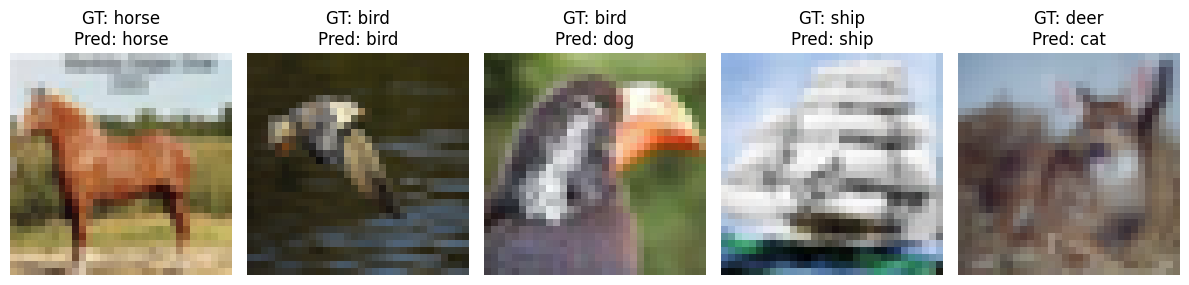

In [170]:
show_random_predictions(model, testset, num_images=5)